[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MzjqlKZwfejNiWM8y22odYaoNbaHF_Hc?usp=sharing)

# Linear Regression - Scikit-Learn

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# URL for practice: https://bit.ly/3LXHV47

salary = pd.read_csv('https://raw.githubusercontent.com/hduc-le/Introduction-to-data-science/main/datasets/Salary_dataset.csv')
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [2]:
X = salary['YearsExperience'].values
y = salary['Salary'].values

print(X.shape)
print(y.shape)

(30,)
(30,)


In [3]:
# split dataset into 90% for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [4]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_train: {y_test.shape}")

Training size: 	X_train: (27, 1) 	y_train: (27, 1)
Testing size: 	X_test: (3, 1) 	y_train: (3, 1)


## Training

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [6]:
print(regressor.coef_)

[[13227.18594294]]


In [7]:
from sklearn import metrics

train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [8]:
print(">> Train MSE: ", metrics.mean_squared_error(y_train, train_pred))
print(">> Test MSE: ", metrics.mean_squared_error(y_test, test_pred))

print(">> Train MAE: ", metrics.mean_absolute_error(y_train, train_pred))
print(">> Test MAE: ", metrics.mean_absolute_error(y_test, test_pred))

print(">> Train R2-Score: ", metrics.r2_score(y_train, train_pred))
print(">> Test R2-Score: ", metrics.r2_score(y_test, test_pred))

>> Train MSE:  161437215.30648682
>> Test MSE:  164188635.53430173
>> Train MAE:  10145.085224869474
>> Test MAE:  11503.951482281691
>> Train R2-Score:  0.7678273257870293
>> Test R2-Score:  0.3458832496516847


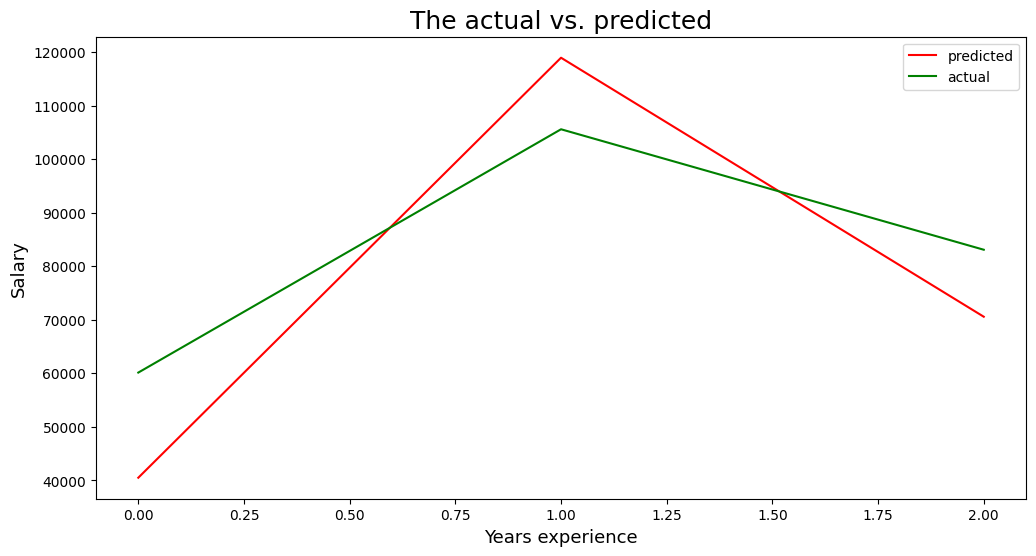

In [167]:
# Visualize the actual vs. predicted
plt.figure(figsize=(12,6))

plt.plot(test_pred, label ='predicted', color = 'red')
plt.plot(y_test, label ='actual', color = 'green')

plt.xlabel('Years experience', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.title('The actual vs. predicted', fontsize=18)
plt.legend()
plt.show()

## Plot regression line against training dataset

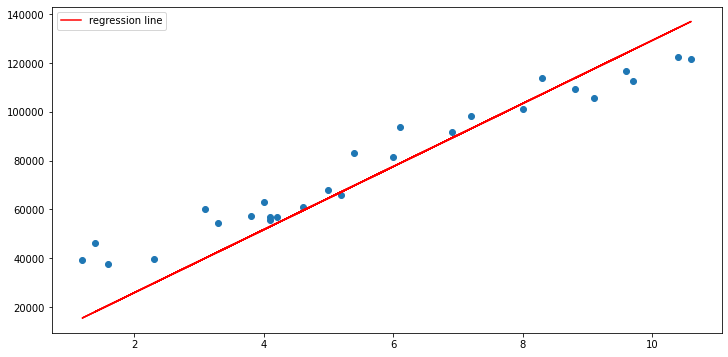

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red', label='regression line')
plt.legend()
plt.show()

## Prediction

In [ ]:
regressor.predict(
    np.array([3.2]).reshape(-1,1)
)

array([[41845.29575439]])

## Linear regression - Closed form

In [ ]:
coef = (np.linalg.inv((X_train.T @ X_train)) @ X_train.T ) @ y_train #pseudo inverse
print(coef)

sklearn_coef = regressor.coef_
print(sklearn_coef)

[[12933.09965269]]
[[12933.09965269]]


# Linear regression - Implementation from scratch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/hduc-le/Introduction-to-data-science/main/datasets/english_score.csv')
data.head()

,TOEFL Score,GRE Score
0,118,337
1,107,324
2,104,316
3,110,322
4,103,314


In [ ]:
X = data['TOEFL Score'].values
y = data['GRE Score'].values

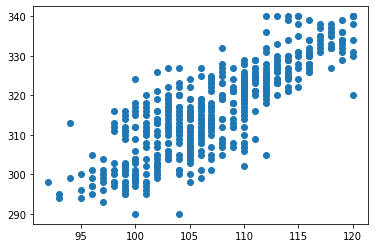

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
print(f">> Training size: \tX: {X.shape} \t y: {y.shape}")

>> Training size: 	X: (500,) 	 y: (500,)


In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

print(f">> Training size: \tX: {X.shape} \t y: {y.shape}")

>> Training size: 	X: (500, 1) 	 y: (500, 1)


In [ ]:
# bias trick
ones = np.ones((X.shape[0], 1))
X = np.concatenate([X, ones], axis=1)

print(f">> Training size: \tX: {X.shape} \t y: {y.shape}")

>> Training size: 	X: (500, 2) 	 y: (500, 1)


In [ ]:
def cost_J(X, y, w, lamb=0.0):
    '''
    Compute mean squared error.
    Params:
        @X: (np.array) data, shape (N,p+1)
        @y: (np.array) labels, shape (N,1)
        @w: (np.array) weights, shape(p+1,1)
    Return: float,
        mean squared error
    '''
    pred = X @ w # Your code here
    mse = 1/2 * np.mean((pred - y)**2) # mse = 1/2 * np.mean((pred - y)**2) + lamb * np.linalg.norm(w)**2 # Regularization
    return mse

def grad_J(X, y, w):
    '''
    Compute the gradient of loss function w.r.t weights
    Params:
        @X: (np.array) data, shape (N,p+1)
        @y: (np.array) labels, shape (N,1)
        @w: (np.array) weights, shape (p+1,1)
    Return: float
    '''
    grad = 1/X.shape[0] * (X.T @ (X @ w - y))
    return grad # Your code here

In [ ]:
# hyperparameters
lr = 1e-4
epochs = 350_000
batch_size = 30
N, p = X.shape

# randomly initialize weights by normal distribution
w = np.random.randn(p, 1) * 0.01

# utils
loss_hist = []
data_ids = list(range(N))

In [ ]:
for ep in range(epochs):
    # shuffle dataset indices
    np.random.shuffle(data_ids)
    iter_loss = []

    # loop over batch of data points
    for start_idx in range(0, N, batch_size):
        selected_ids = data_ids[start_idx: start_idx + batch_size]      # select batch of index
        batch_x = X[selected_ids]                                       # select batch of samples by the indices
        batch_y = y[selected_ids]                                       # select batch of labels by the indices

        # compute the loss
        loss = cost_J(batch_x, batch_y, w)

        # compute the gradient
        dw = grad_J(batch_x, batch_y, w)

        # update weights
        w = w - lr * dw

        # gather losses
        iter_loss.append(loss)

    if ep % 10_000 == 0: # print every 10_000 epoch
        print(">> Epoch [{}/{}]: loss = {}".format(ep, epochs, np.mean(iter_loss)))

    # gather epoch loss
    loss_hist.append(np.mean(iter_loss))

>> Epoch [0/350000]: loss = 3074.164674076374
>> Epoch [10000/350000]: loss = 54.01862155629432
>> Epoch [20000/350000]: loss = 51.355381194789096
>> Epoch [30000/350000]: loss = 49.068023634119086
>> Epoch [40000/350000]: loss = 48.23444147144761
>> Epoch [50000/350000]: loss = 46.00861875597242
>> Epoch [60000/350000]: loss = 40.34293212559174
>> Epoch [70000/350000]: loss = 39.454244191917056
>> Epoch [80000/350000]: loss = 35.3477284967056
>> Epoch [90000/350000]: loss = 35.129514335122614
>> Epoch [100000/350000]: loss = 34.415812502700646
>> Epoch [110000/350000]: loss = 31.981781394025454
>> Epoch [120000/350000]: loss = 31.37598023825551
>> Epoch [130000/350000]: loss = 30.78558027382556
>> Epoch [140000/350000]: loss = 29.115782972987073
>> Epoch [150000/350000]: loss = 27.961758943856672
>> Epoch [160000/350000]: loss = 26.9899329606687
>> Epoch [170000/350000]: loss = 27.10505912316743
>> Epoch [180000/350000]: loss = 25.747625089634077
>> Epoch [190000/350000]: loss = 25.96

In [ ]:
print("Model weights: ", w)

Model weights:  [[  1.73050055]
 [129.2958932 ]]


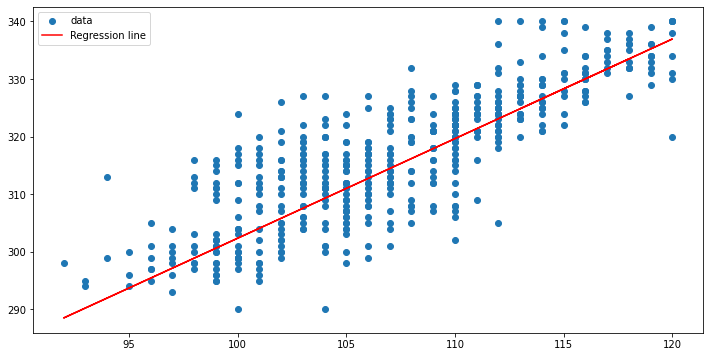

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], y, label='data')
plt.plot(X[:,0], X @ w, label='Regression line', color='red')
plt.legend()
plt.show()

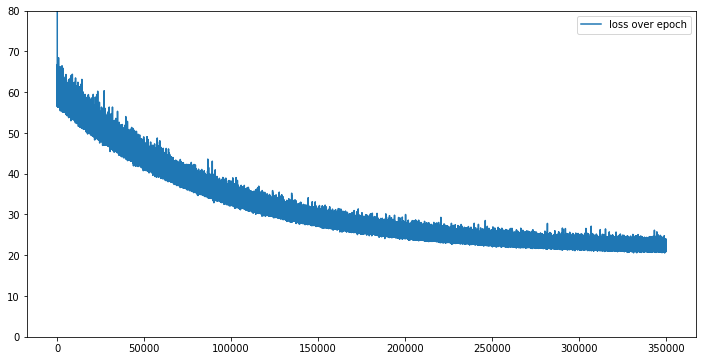

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(loss_hist, label='loss over epoch')
plt.ylim(0, 80)
plt.legend()
plt.show()

# Regression Analysis

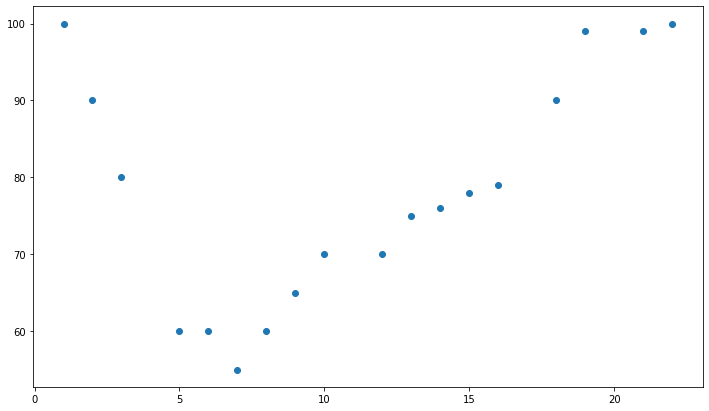

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.figure(figsize=(12,7))
plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

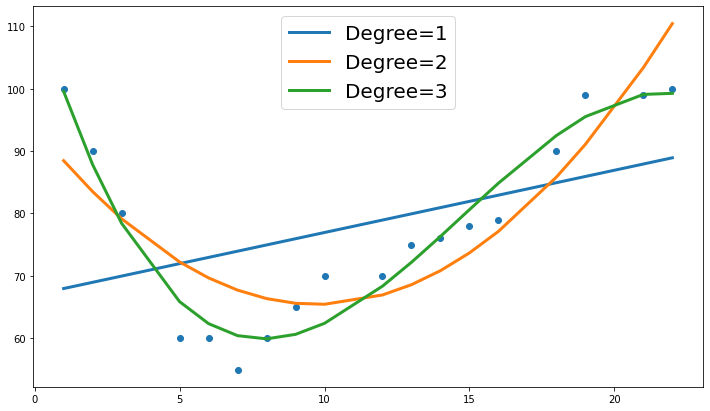

In [ ]:
X = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

degrees = [1, 2, 3]

plt.figure(figsize=(12,7))
plt.scatter(X, y)

for d in degrees:
    pipeline = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=d)),
        ("regressor", LinearRegression()),
    ])

    pipeline.fit(X,y)
    plt.plot(X, pipeline.predict(X), label=f'Degree={d}', linewidth=3)

plt.legend(loc='upper center', fontsize=20)
plt.show()

## Lasso vs. Ridge

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg_ridge = Ridge(alpha = 1.0)
reg_ridge.fit(X_train, y_train)

# Sai số huấn luyện của mô hình trên tập train
print("R2-Score: ", reg_ridge.score(X_train, y_train))

# Hệ số hồi qui
print("Coef: ", reg_ridge.coef_)
print("Intercept: ", reg_ridge.intercept_)

R2-Score:  0.4062759706618534
Coef:  [  40.22980953  -61.68895989  273.28957886  197.33039238   -1.61646667
  -19.12539101 -142.98112377  107.37594422  195.22479197   84.33273189]
Intercept:  150.9272164651888


In [ ]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 1.0)
reg_lasso.fit(X_train, y_train)

# Sai số huấn luyện trên tập train
print("R2-Score: ", reg_lasso.score(X_train, y_train))

# Hệ số hồi qui
print("Coef: ", reg_lasso.coef_)
print("Intecept: ", reg_lasso.intercept_)

R2-Score:  0.34247491466833135
Coef:  [  0.          -0.         425.89571524  69.18564617   0.
   0.          -0.           0.         177.77602164   0.        ]
Intecept:  150.9774022110965


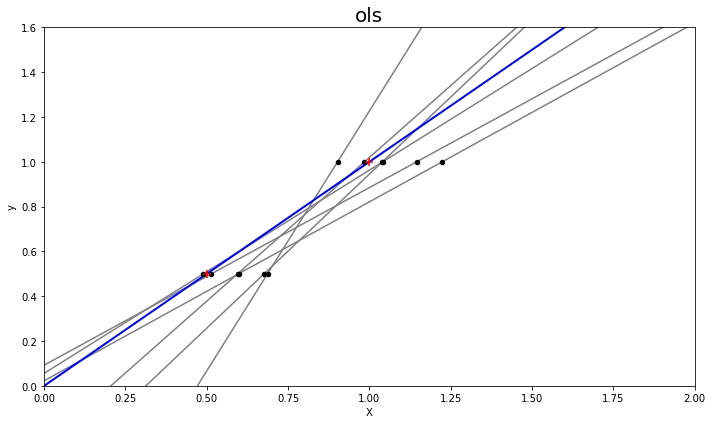

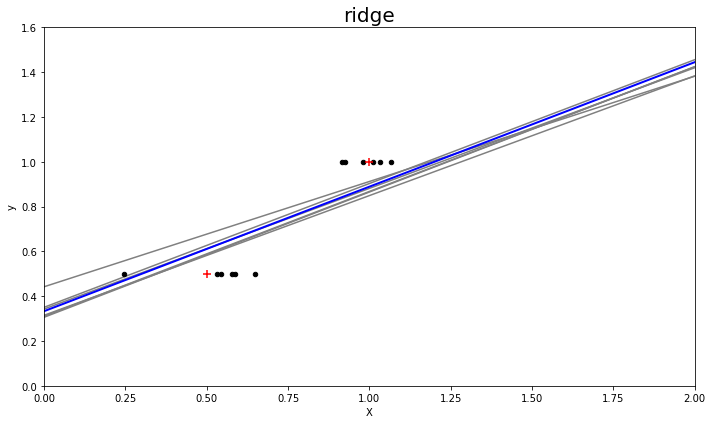

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(10, 6))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train # z = mu + sigma*eps; where eps ~ N(0,1)
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=20, c="black", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=50, c="red", marker="+", zorder=10)

    ax.set_title(name, fontsize=20)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

# Synthetic Control

In [ ]:
url = 'https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/master/causal-inference-for-the-brave-and-true/data/smoking.csv'
df = pd.read_csv(url)

In [ ]:
cigar = df.drop(columns=["lnincome","beer", "age15to24"])
cigar.query("california").head()

In [ ]:
ax = plt.subplot(1, 1, 1)

(cigar
 .assign(california = np.where(cigar["california"], "California", "Other States"))
 .groupby(["year", "california"])
 ["cigsale"]
 .mean()
 .reset_index()
 .pivot("year", "california", "cigsale")
 .plot(ax=ax, figsize=(10,5)))

plt.vlines(x=1988, ymin=40, ymax=140, linestyle=":", lw=2, label="Proposition 99")
plt.ylabel("Cigarette Sales Trend")
plt.title("Gap in per-capita cigarette sales (in packs)")
plt.legend();

In [ ]:
features = ["cigsale", "retprice"]

inverted = (cigar.query("~after_treatment") # filter pre-intervention period
            .pivot(index='state', columns="year")[features] # make one column per year and one row per state
            .T) # flip the table to have one column per state

inverted.head()

In [ ]:
y = inverted[3].values # state of california
X = inverted.drop(columns=3).values  # other states

In [ ]:
from sklearn.linear_model import LinearRegression
weights_lr = LinearRegression(fit_intercept=False).fit(X, y).coef_
weights_lr.round(3)

In [ ]:
calif_synth_lr = (cigar.query("~california")
                  .pivot(index='year', columns="state")["cigsale"]
                  .values.dot(weights_lr))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(cigar.query("california")["year"], cigar.query("california")["cigsale"], label="California")
plt.plot(cigar.query("california")["year"], calif_synth_lr, label="Synthetic Control")
plt.vlines(x=1988, ymin=40, ymax=140, linestyle=":", lw=2, label="Proposition 99")
plt.ylabel("Gap in per-capita cigarette sales (in packs)")
plt.legend();

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5,fit_intercept=False, positive=True)
weights_lr = reg.fit(X, y).coef_
weights_lr.round(3)

In [ ]:
calif_synth_lr = (cigar.query("~california")
                  .pivot(index='year', columns="state")["cigsale"]
                  .values.dot(weights_lr))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(cigar.query("california")["year"], cigar.query("california")["cigsale"], label="California")
plt.plot(cigar.query("california")["year"], calif_synth_lr, label="Synthetic Control")
plt.vlines(x=1988, ymin=40, ymax=140, linestyle=":", lw=2, label="Proposition 99")
plt.ylabel("Gap in per-capita cigarette sales (in packs)")
plt.legend()